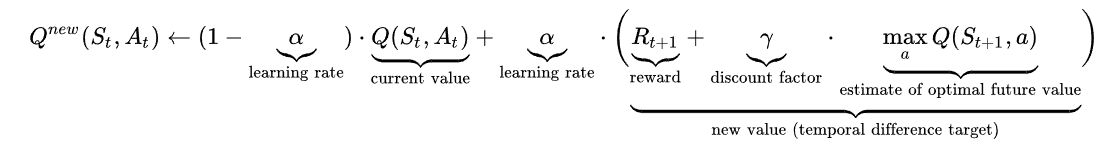

In [6]:
import gym
import numpy as np
from q_table import QTable


In [11]:
# get environment
env = gym.make('CartPole-v1', render_mode='rgb_array')

# Q table
pos_space = np.linspace(-2.4, 2.4, 5)
vel_space = np.linspace(-4, 4, 5)
ang_space = np.linspace(-0.2095, 0.2095, 15)
ang_vel_space = np.linspace(-4, 4, 15)

q_table = QTable(env, [pos_space, vel_space, ang_space, ang_vel_space], env.action_space.n)

In [ ]:
# Q learning
total_rewards = 0
for episode in range(20000):
    state = env.reset()[0]

    terminated = False
    episode_reward = 0
    while not terminated:
        action = q_table.choose_action(state)

        new_state, reward, terminated, truncated, info = env.step(action)

        if not terminated:  # update q-table
            q_table.update_q_table(state, action, reward, new_state)
        episode_reward += reward
        state = new_state

    q_table.update_exploration_rate()
    if episode % 100 == 0:
        print(
            f'Episode: {episode}, reward: {episode_reward}, exploration rate: {q_table.exploration_rate}'
        )

    total_rewards += episode_reward
    if total_rewards / (episode + 1) > 1000:
        break

env.close()

q_trained = q_table

In [ ]:
# get environment
final_env = gym.make('CartPole-v1', render_mode='human')

for _ in range(10):
    state = final_env.reset()[0]

    terminated = False
    while not terminated:
        action = q_trained.choose_action(state, explore=False)
        state, reward, terminated, truncated, info = final_env.step(action)

In [15]:
final_env.close()